In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from methods.paus import PAUS
from oracles.oracle import OperatorOracle
from oracles.point import OTProblemOracle
from utils.dataset import get_gaussian, load_mnist784
from utils.tm import get_2d_tm, get_1d_tm

In [4]:
np.random.seed(30)

# MNIST 784

In [52]:
digits = load_mnist784(4)

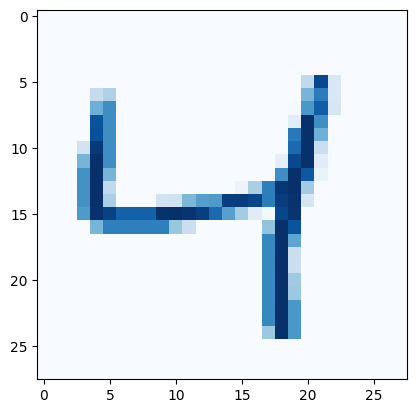

In [53]:
img = digits[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [ ]:
d = len(digits[0])
d

# Gaussian

In [7]:
def get_method_gaussians(d: int, T: int) -> tuple[PAUS, float]:
    C = get_1d_tm(d)
    histograms, bar_true = get_gaussian(d, T)
    n = T // 4 * 3
    oracles = [OTProblemOracle(histograms[i], C) for i in range(T)]
    F, F1 = OperatorOracle(oracles, d, T), OperatorOracle(oracles, d, n)
    method = PAUS(F, F1, 1, 1, True, bar_true=bar_true)
    delta = 2 * (T - n) / T
    print(n, T, delta)

    return method, delta

In [8]:
method, delta = get_method_gaussians(10, 100)

75 100 0.5


In [9]:
z_star, history = method.fit(delta, 500)

Iter: 0
Err: 0.09150053587902386
Iter: 10
Err: 0.05572531142906051
Iter: 20
Err: 0.02856928909594198
Iter: 30
Err: 0.04816538303751552
Iter: 40
Err: 0.02602172612402827
Iter: 50
Err: 0.028569280760683394
Iter: 60
Err: 0.028567642150588376
Iter: 70
Err: 0.04882165218526801
Iter: 80
Err: 0.05580820989493713
Iter: 90
Err: 0.04934069132766586
Iter: 100
Err: 0.04816552117093176
Iter: 110
Err: 0.028569289095941947
Iter: 120
Err: 0.02856928909465498
Iter: 130
Err: 0.048114538929764736
Iter: 140
Err: 0.026021726123995444
Iter: 150
Err: 0.03601947754758206
Iter: 160
Err: 0.02598348643994855
Iter: 170
Err: 0.048041988817617
Iter: 180
Err: 0.028335539913926767
Iter: 190
Err: 0.02856928909594198
Iter: 200
Err: 0.028569289094614755
Iter: 210
Err: 0.028784410992575563
Iter: 220
Err: 0.02764527673603255
Iter: 230
Err: 0.048165521173789125
Iter: 240
Err: 0.02602172612402815
Iter: 250
Err: 0.02602172612268813
Iter: 260
Err: 0.028520889366970663
Iter: 270
Err: 0.048165521176805906
Iter: 280
Err: 0.02649

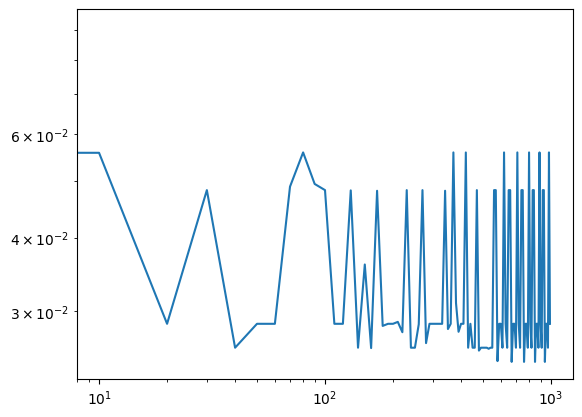

In [10]:
plt.loglog(range(0, 1000, 10), history["err"])

In [ ]:
import pickle

In [ ]:
with open(f"paus_gaussian_history.pkl", "wb") as f:
    pickle.dump(history, f)
with open(f"paus_gaussian_z.pkl", "wb") as f:
    pickle.dump(z_star, f)